In [1]:
import os
import sys
os.chdir('../')
new_current_dir = os.getcwd()  # get new current working directory
print("New current directory:", new_current_dir)
sys.path.append('./src/python/')

New current directory: /home/fiftyfour/Documents/NetworkPricingGraphContraction


In [45]:
import glob
best_files = glob.glob(os.path.join('./result/max_clique', '*_my_max_clique_approx_best.txt'))
initial_files = [file.replace('best', 'initial') for file in best_files]
ny_files = [file.replace('_best', '').replace('_my_', '_nx_') for file in best_files]


name = lambda x: os.path.splitext(os.path.basename(x[0]))[0].replace('_my_max_clique_approx_best', '')
files = [(*x, name(x))  for x in zip(best_files, initial_files, ny_files)]



In [46]:
import pandas as pd

def merging(best_file, initial_file, nx_file, name):
    df1 = pd.read_csv(best_file, sep='\t', index_col='iteration')
    df2 = pd.read_csv(initial_file, sep='\t', index_col='iteration')
    df3 = pd.read_csv(nx_file, sep='\t', index_col='iteration')

    # Rename the 'time' column in each DataFrame
    df1.rename(columns={'time': 'best_time', 'lenght': 'best_length',}, inplace=True)
    df2.rename(columns={'time': 'initial_time', 'lenght': 'initial_length',}, inplace=True)
    df3.rename(columns={'time': 'nx_time', 'lenght': 'nx_length',}, inplace=True)

    # Merge them side by side
    merged_df = pd.concat([df1, df2, df3], axis=1)
    merged_df['name'] = name

    # # Optionally, save the merged DataFrame to a new CSV file
    # merged_df.to_csv('./result/max_clique/merged_output.csv', index=False)
    return merged_df

merged_df_list = []
for args in files:
    merged_df_list.append(merging(*args))
    
big_merged_df = pd.concat(merged_df_list, axis=0)
big_merged_df

,best_length,best_time,initial_length,initial_time,nx_length,nx_time,name
iteration,,,,,,,
1,77,0.963369,77,0.760359,66,1.145227,d40-03
2,77,0.932568,76,0.771413,68,1.188897,d40-03
3,77,0.952638,77,0.790141,70,1.164703,d40-03
4,77,0.942761,76,0.745529,70,1.129713,d40-03
5,77,0.939521,75,0.756086,74,1.170962,d40-03
...,...,...,...,...,...,...,...
236,53,0.227510,53,0.176424,48,0.311815,h40-06
237,53,0.228632,53,0.177219,49,0.312719,h40-06
238,53,0.221980,53,0.174434,46,0.308986,h40-06


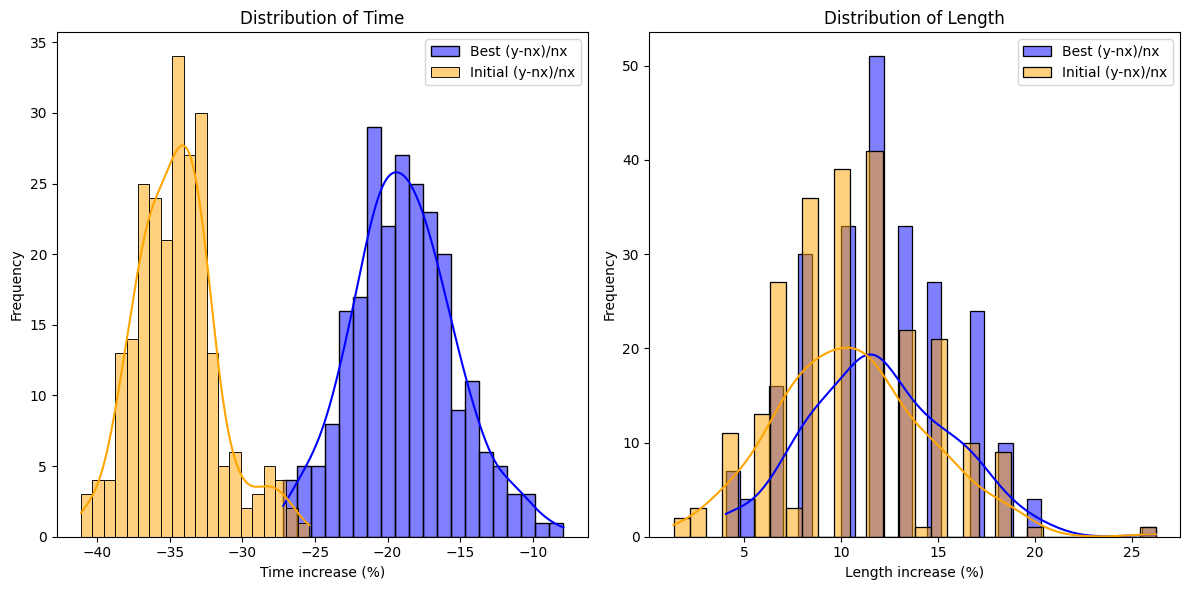

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Load the merged DataFrame
# merged_df = pd.read_csv('./result/max_clique/merged_output.csv', index_col='iteration')


# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
# Define colors for each dataset
colors_time = ['blue', 'orange']#, 'green']
colors_length = ['blue', 'orange']#, 'green']

# Distribution plot for time
plt.subplot(1, 2, 1)
sns.histplot(100*(merged_df['best_time']-merged_df['nx_time'])/merged_df['nx_time'], bins=20, kde=True, color=colors_time[0], label='Best (y-nx)/nx')
sns.histplot(100*(merged_df['initial_time']-merged_df['nx_time'])/merged_df['nx_time'], bins=20, kde=True, color=colors_time[1], label='Initial (y-nx)/nx')
#sns.histplot(merged_df['nx_time'], bins=20, kde=True, color=colors_time[2], label='NX')
plt.title('Distribution of Time')
plt.xlabel('Time increase (%)')
plt.ylabel('Frequency')
plt.legend()

# Distribution plot for length
plt.subplot(1, 2, 2)
sns.histplot(100*(merged_df['best_length']-merged_df['nx_length'])/merged_df['nx_length'], bins=30, kde=True, color=colors_length[0], label='Best (y-nx)/nx')
sns.histplot(100*(merged_df['initial_length']-merged_df['nx_length'])/merged_df['nx_length'], bins=30, kde=True, color=colors_length[1], label='Initial (y-nx)/nx')
#sns.histplot(merged_df['nx_length'], bins=30, kde=True, color=colors_length[2], label='NX')
plt.title('Distribution of Length')
plt.xlabel('Length increase (%)')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
